# Project - Identify Data

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- World population growth rate
- Is the growth rate stable? Increasing or Declining?

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Explore and understand problem
- What data do we need to answer the problem?

### Step 1.b: Indentify data with world population
- There are multiple sources
- World bank: https://data.worldbank.org/indicator/SP.POP.TOTL
- Wiki: https://en.wikipedia.org/wiki/World_population
- ...and probably more


### Step 1.c: Download and import the data
- We will download it from World Bank

### Step 1.d: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.e: Read the data
- Use ```pd.read_csv()``` to read the file `files/API_SP/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- HELP: You might need to `skiprows=4`
- Apply ```.head()``` on the data to see all is as expected

In [2]:
data = pd.read_csv('files/API_SP/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv', skiprows=4)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


### Step 1.f: Get world data
- We are only insterested in data for the world.
- The data can be identified by `Country Name` (World) or `Country Code` (WLD).
- This can be done as follows:
```Python
data[data['Country Name'] == 'World']
```
- NOTE: Remember to keep data

In [3]:
dataset = data[data['Country Name'] == 'World']

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [4]:
dataset.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

### Step 2.b: Keep only needed columns
- We are only interested in the year columns.
- You can drop the other columns by: ```.drop(list_of_columns_to_delete, axis='columns')```
- Notice there is a `unnamed` column.
    - Remove it with `dataset.dropna(how='all', axis='columns')`

In [5]:
dataset = dataset.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis='columns')

In [6]:
dataset = dataset.dropna(how='all', axis='columns')

### Step 2.c: Transpose data
- It makes sense to have years in the rows
- This can be done with `.transpose()`

In [7]:
dataset = dataset.transpose()

In [8]:
dataset.head()

,259
1960,3.032156e+09
1961,3.071596e+09
1962,3.124561e+09
1963,3.189656e+09
1964,3.255146e+09


### Step 2.d: Rename column
- The name 259 can be renamed as follows
- This can be done as follows
```.rename(columns={259:'World Population'})```

In [9]:
dataset = dataset.rename(columns={259:'World Population'})

In [10]:
dataset.head()

,World Population
1960,3.032156e+09
1961,3.071596e+09
1962,3.124561e+09
1963,3.189656e+09
1964,3.255146e+09


### Step 2.e: Visualize data
- This is done to check data quality
- You can plot the DataFrame with `.plot()`

<AxesSubplot:>

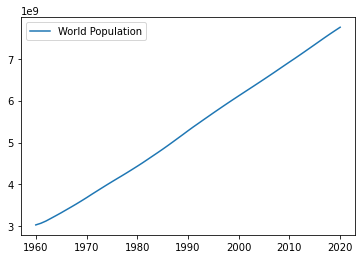

In [11]:
dataset.plot()

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Calculate yearly percentage change
- We want to explore the growth of the world population
- First step is to calculate the yearly growth
- This can be done with `pct_change()` ([docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html))
- Add a new column `Yearly growth` with the growth in percentage

In [12]:
dataset['Yearly growth'] = dataset['World Population'].pct_change()

### Step 3.b: Visualize the Yearly growth
- Plot it with `.plot()`
- This will give you an idea of the trend.

<AxesSubplot:>

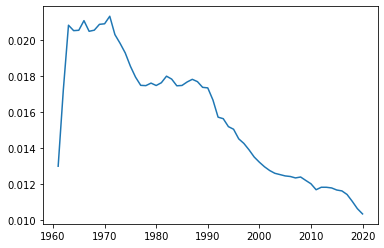

In [13]:
dataset['Yearly growth'].plot()

### Step 3.c: Smooth the result
- A great way is to smooth the result
- This can show local tendencies
- Calculate a 10-years rolling average by using [rolling(10)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).[mean()](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html)
```Python
dataset['Yearly growth'].rolling(10).mean()
```
- Visualize the result
    - HINT: Make a plot containing `Yearly growth` and the new calculation.
- What does that tell you?

<AxesSubplot:>

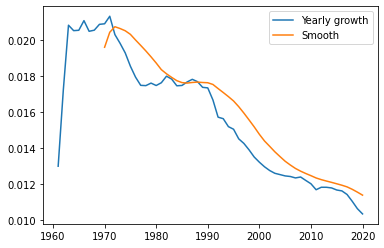

In [20]:
dataset['Smooth'] = dataset['Yearly growth'].rolling(10).mean()

dataset[['Yearly growth', 'Smooth']].plot()

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Transform data
- To make plot more readable transform data to percentage
    - HINT: Multiply columns data `Yearly growth` and the smoothed data by 100

In [22]:
dataset['Yearly growth'] *= 100
dataset['Smooth'] *= 100

### Step 4.b: Set title and labels on axis
- In the plot set labels and axis
    - `xlabel='Year'` the same for `ylabel` and `title`

<AxesSubplot:title={'center':'World population growth'}, xlabel='Year', ylabel='Yearly growth'>

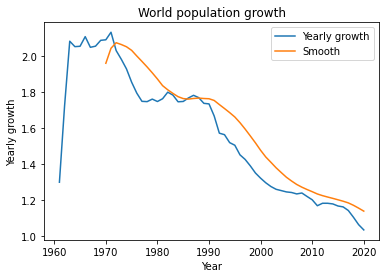

In [24]:
dataset[['Yearly growth', 'Smooth']].plot(xlabel='Year', ylabel='Yearly growth', title='World population growth')

### Step 4.c: Adding ranges on axis
- Add range on y-axis to make the plot more readable.
- Use `ylim=0`

<AxesSubplot:title={'center':'World population growth'}, xlabel='Year', ylabel='Yearly growth'>

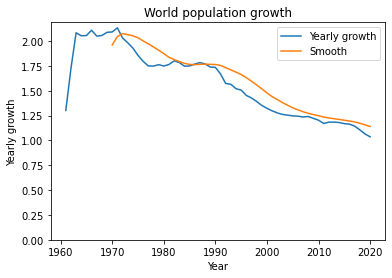

In [25]:
dataset[['Yearly growth', 'Smooth']].plot(xlabel='Year', ylabel='Yearly growth', title='World population growth', ylim=0)

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a
- Any insights to use?
- Do we need to make predictions based on it?